In [1]:
## Main Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## To draw DT
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

## Embeded Datasets
from sklearn import datasets

## For shuffling the Dataset
from sklearn import utils

## Metric
from sklearn.metrics import accuracy_score

## Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, cross_val_predict

## Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

## Ensemble Models (There is for Classification and Regression)
from sklearn.ensemble import VotingClassifier, VotingRegressor                          ## One for each task
from sklearn.ensemble import BaggingClassifier, BaggingRegressor                        ## One for each task
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor              ## one for each task
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor                      ## one for each task
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor      ## one for each task


## XGBoost
import xgboost as xgb

## `Classification`

### `Loading the iris Dataset`

In [2]:
## Load the iris dataset from the embeded datasets provided in sklearn
iris_dataset = datasets.load_iris()

## check the dataset by checking its keys
iris_dataset.keys()           ## each key has data or information

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
## Let's get all together and create a DF
## I will do it in very fast way and it is my preferable one, but there are many ways as we learned together 

df_iris = pd.DataFrame(np.c_[iris_dataset['data'], iris_dataset['target'].reshape(-1, 1)], 
                       columns=iris_dataset['feature_names']+['target'])

## check the head
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [4]:
## Let's shuffle the Dataset as you see that the target is ordered (0 then 1 then 2) --> Classification problem
## You can use function (sample) provided in pandas or use (shuffle) in sklearn
df_iris = utils.shuffle(df_iris, random_state=42)   ## shuffle and overwrite

## check the head again
df_iris.head()    ## OK

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
73,6.1,2.8,4.7,1.2,1.0
18,5.7,3.8,1.7,0.3,0.0
118,7.7,2.6,6.9,2.3,2.0
78,6.0,2.9,4.5,1.5,1.0
76,6.8,2.8,4.8,1.4,1.0


### `Exploratory Data Analysis (EDA)`

In [5]:
## Do it Yourself

### `Preprocessing`
`The Dataset is very small, It is a Toy example, I will not split the data`

In [6]:
### Split the Dataset to Features and Target
X = df_iris.drop(columns=['target'], axis=1)
y = df_iris['target']

In [7]:
## Let's impute (although there is no nulls) and standardize the Dataset ---> All in Pipeline
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
                              ]
                       )

X_train = num_pipeline.fit_transform(X)
y_train = y.copy()   ## doesn't matter

### `Building a ML Model`
* `Evaluation Metric is Accuracy`

### `1. Logistic Regression` 

In [8]:
## Logistic Regression
logit_clf = LogisticRegression(C=0.1)
logit_clf.fit(X_train, y_train)  ## Train

LogisticRegression(C=0.1)

In [9]:
## Using cross validation for prediction and evaluation
acc_scores_logit = cross_val_score(estimator=logit_clf, X=X_train, y=y_train, cv=5, n_jobs=-1, scoring='accuracy')
print(f'Accuracy (Mean) scores using "Logistic Regression" -- {acc_scores_logit.mean():.3f}', )

## Prediction using cross validation
y_pred_logit = cross_val_predict(estimator=logit_clf, X=X_train, y=y_train, cv=5, n_jobs=-1, method='predict')

Accuracy (Mean) scores using "Logistic Regression" -- 0.913


### `2. KNN`

In [10]:
## Using KNN
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)  ## Train

KNeighborsClassifier()

In [11]:
## Using cross validation for prediction and evaluation
acc_scores_knn = cross_val_score(estimator=knn_clf, X=X_train, y=y_train, cv=5, n_jobs=-1, scoring='accuracy')
print(f'Accuracy (Mean) scores using "KNN" -- {acc_scores_knn.mean():.3f}', )

## Prediction using cross validation
y_pred_knn = cross_val_predict(estimator=knn_clf, X=X_train, y=y_train, cv=5, n_jobs=-1, method='predict')

Accuracy (Mean) scores using "KNN" -- 0.947


### `3. SVC`

In [12]:
## Using SVMs
svm_clf = SVC(kernel='linear', C=0.1, probability=True)
svm_clf.fit(X_train, y_train)  ## Train

SVC(C=0.1, kernel='linear', probability=True)

In [13]:
## Using cross validation for prediction and evaluation
acc_scores_svm = cross_val_score(estimator=svm_clf, X=X_train, y=y_train, cv=5, n_jobs=-1, scoring='accuracy')
print(f'Accuracy (Mean) scores using "SVM" -- {acc_scores_svm.mean():.3f}', )

## Prediction using cross validation
y_pred_svm = cross_val_predict(estimator=svm_clf, X=X_train, y=y_train, cv=5, n_jobs=-1, method='predict')

Accuracy (Mean) scores using "SVM" -- 0.947


### `Decision Trees`

In [14]:
## Decison Trees
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=2)
tree_clf.fit(X_train, y_train)  ## Train

DecisionTreeClassifier(max_depth=2)

In [15]:
## Using cross validation for prediction and evaluation
acc_scores_tree = cross_val_score(estimator=tree_clf, X=X_train, y=y_train, cv=5, n_jobs=-1, scoring='accuracy')
print(f'Accuracy (Mean) scores using "Decision Trees" -- {acc_scores_tree.mean():.3f}', )

## Prediction using cross validation
y_pred_tree = cross_val_predict(estimator=tree_clf, X=X_train, y=y_train, cv=5, n_jobs=-1, method='predict')

Accuracy (Mean) scores using "Decision Trees" -- 0.927


> * `Enough, Let's vote all the above models`

### `Voting Classifiers`

In [16]:
## Voting the above 4 models, firstly --------> try tuning the above models before voting
voting_clf = VotingClassifier(estimators=
                                    [
                                        ('logit', logit_clf),
                                        ('knn', knn_clf),
                                        ('svm', svm_clf),
                                        ('tree', tree_clf)
                                    ], 
                              voting='hard'      ## --> Try using (hard), take your time playing with code.
                            )
## deal with the (voting_clf) as an ordinary model                
voting_clf.fit(X_train, y_train)  ## Train

VotingClassifier(estimators=[('logit', LogisticRegression(C=0.1)),
                             ('knn', KNeighborsClassifier()),
                             ('svm',
                              SVC(C=0.1, kernel='linear', probability=True)),
                             ('tree', DecisionTreeClassifier(max_depth=2))])

In [17]:
## Using cross validation for prediction and evaluation
acc_scores_voting = cross_val_score(estimator=voting_clf, X=X_train, y=y_train, cv=5, n_jobs=-1, scoring='accuracy')
print(f'Accuracy (Mean) scores using "Voting Classifier" -- {acc_scores_voting.mean():.3f}', )

## Prediction using cross validation
y_pred_voting = cross_val_predict(estimator=voting_clf, X=X_train, y=y_train, cv=5, n_jobs=-1, method='predict')

Accuracy (Mean) scores using "Voting Classifier" -- 0.960


In [18]:
## Getting all together 
models_outs = {logit_clf:y_pred_logit, 
               knn_clf:y_pred_knn, 
               svm_clf:y_pred_svm, 
               tree_clf:y_pred_tree, 
               voting_clf:y_pred_voting}

for idx, clf in enumerate(models_outs.keys()):
    y_pred_each_clf = [*models_outs.values()][idx]   ## prediction for each model
    acc_score = accuracy_score(y_train, y_pred_each_clf)   ## accuracy
    print(clf.__class__.__name__, '-------', f'Accuracy score is : {acc_score:.4f}')

LogisticRegression ------- Accuracy score is : 0.9133
KNeighborsClassifier ------- Accuracy score is : 0.9467
SVC ------- Accuracy score is : 0.9467
DecisionTreeClassifier ------- Accuracy score is : 0.9333
VotingClassifier ------- Accuracy score is : 0.9600


### `Bagging & Pasting`

In [19]:
## Bagging and pasting for Decision Trees  ---> take your time discovering the hyperparameters
## (max_samples) & (max_features) --> when (float) it will be a ratio from samples and features 
## (max_samples) & (max_features) --> when (int) the number taken from samples and features 
## (bootstrap_features) is working the same as (bootstrap) working but for features, (bootstrap) for samples.. --> take care
bag_clf = BaggingClassifier(
                  base_estimator=DecisionTreeClassifier(max_depth=2, criterion='gini'),    ## the base model itself
                  n_estimators=100,                       ## Number of predictors (imortant Hyperparam)
                  max_samples=0.8, max_features=1.0,     
                  bootstrap=True,                         ## True --> Bagging & False --> Pasting
                  oob_score=True,                         ## If you want to evaluate on oob set
                  random_state=42, n_jobs=-1              ## Additional params
                          )             

bag_clf.fit(X_train, y_train)  ## train and deal with it as an ordinary model 

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                  max_samples=0.8, n_estimators=100, n_jobs=-1, oob_score=True,
                  random_state=42)

In [20]:
## Using cross validation for prediction and evaluation
acc_scores_bagTree = cross_val_score(estimator=bag_clf, X=X_train, y=y_train, cv=5, n_jobs=-1, scoring='accuracy')
print(f'Accuracy (Mean) scores using "Bagging of DT" -- {acc_scores_bagTree.mean():.3f}', )

## oob now will be an attribute in the model as we set to True in the model
## oob score gives an indication about the final score on test set, as model doesn't touch them while training.
print('Evaluation of Out-of-Bag set is -- ', bag_clf.oob_score_)

## Prediction using cross validation
y_pred_bagTree = cross_val_predict(estimator=bag_clf, X=X_train, y=y_train, cv=5, n_jobs=-1, method='predict')

Accuracy (Mean) scores using "Bagging of DT" -- 0.940
Evaluation of Out-of-Bag set is --  0.94


### `RandomForest`

In [21]:
## One of the most powerfull ML models avilable today, RandomForest (all is random)
## Instead of building number of DT using Bagging, sklearn implemented RandomForest Model and it is very optimized

forest_clf = RandomForestClassifier(n_estimators=100, max_depth=3, max_leaf_nodes=20, 
                                    criterion='gini', max_features=1.0, max_samples=0.8)
forest_clf.fit(X_train, y_train)  ## train

RandomForestClassifier(max_depth=3, max_features=1.0, max_leaf_nodes=20,
                       max_samples=0.8)

In [22]:
## Using cross validation for prediction and evaluation
acc_scores_forest = cross_val_score(estimator=forest_clf, X=X_train, y=y_train, cv=5, n_jobs=-1, scoring='accuracy')
print(f'Accuracy (Mean) scores using "RandomForest" -- {acc_scores_forest.mean():.3f}', )

## Prediction using cross validation
y_pred_forest = cross_val_predict(estimator=forest_clf, X=X_train, y=y_train, cv=5, n_jobs=-1, method='predict')

Accuracy (Mean) scores using "RandomForest" -- 0.960


``` python
    ## The above RandomForest Model is equal to the following Bagging
    equal_forest = BaggingClassifier( 
                                    base_estimator=DecisionTreeClassifier(max_depth=3, 
                                                                          splitter='random',   ## random split
                                                                          criterion='gini', 
                                                                          max_leaf_nodes=20), 
                                    n_estimators=100,
                                    max_features=1.0, 
                                    max_samples=0.8
                                    )

    ## Instead of using this technique --> we always use RandomForest provided in sklearn
```

### `Feature Importance using RF`

In [23]:
## Getting the Features Importance (they are normalized in RF, sum=1)
feat_dict = {}      ## to append in it
for name, score in zip(iris_dataset['feature_names'], forest_clf.feature_importances_):  ## using the attribute provided
    feat_dict[name] = score

## Features are keys, Importance is the value
keys_forest = feat_dict.keys()
values_forest = feat_dict.values()

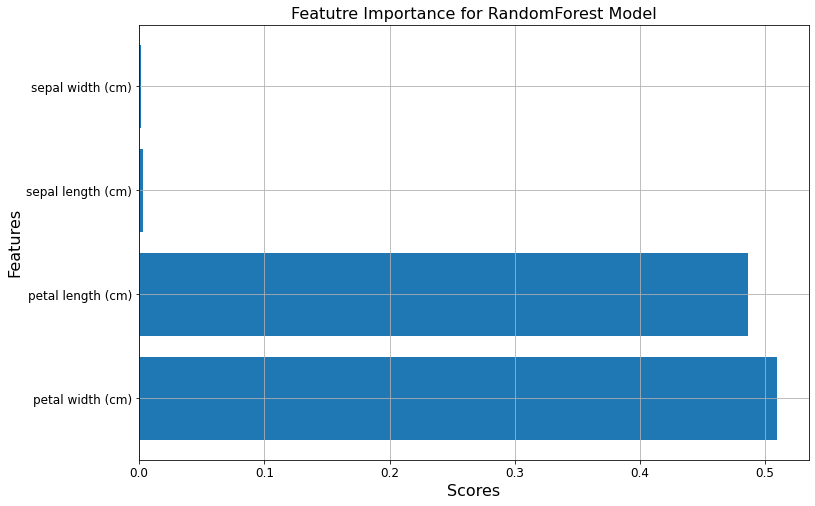

In [24]:
## to DF and then plotting
df_feat_import_forest = pd.DataFrame({'Features': keys_forest, 'Scores': values_forest})
df_feat_import_forest = df_feat_import_forest.sort_values(by='Scores', ascending=False)

## plotting
plt.figure(figsize=(12, 8))
plt.barh(y=df_feat_import_forest['Features'], width=df_feat_import_forest['Scores'])
plt.title('Featutre Importance for RandomForest Model', fontsize=16, c='k')
plt.xlabel('Scores', fontsize=16, c='k')
plt.ylabel('Features', fontsize=16, c='k')
plt.xticks(c='k', fontsize=12)
plt.yticks(c='k', fontsize=12)
plt.grid('on')
plt.show()

### `Boosting`
* > `The general idea of most boosting methods is to train predictors "sequentially", each trying to correct its predecessor. `

### `Adaboost`

In [25]:
## using adaboost for DT as the base estimator
adaboost_clf = AdaBoostClassifier(
                                    base_estimator=DecisionTreeClassifier(criterion='gini', max_depth=3), 
                                    n_estimators=100, 
                                    algorithm='SAMME.R', 
                                    learning_rate=0.5
                                  )
adaboost_clf.fit(X_train, y_train)  ## train

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.5, n_estimators=100)

In [26]:
## Using cross validation for prediction and evaluation
acc_scores_adaboost = cross_val_score(estimator=adaboost_clf, X=X_train, y=y_train, cv=5, n_jobs=-1, scoring='accuracy')
print(f'Accuracy (Mean) scores using "Adaboost" -- {acc_scores_adaboost.mean():.3f}', )

## Prediction using cross validation
y_pred_adaboost = cross_val_predict(estimator=adaboost_clf, X=X_train, y=y_train, cv=5, n_jobs=-1, method='predict')

Accuracy (Mean) scores using "Adaboost" -- 0.933


### `Gradient Bossting`
* > `A simpler way to train GB ensembles is to use Scikit-Learn’s GradientBoostingRegressor class,  Much like the RandomForestRegressor class, it has hyperparameters to control the growth of Decision Trees, The same is done for classification`

In [27]:
## The learning_rate hyperparameter scales the contribution of each tree. If you set it to a low value, such as 0.1 ..
## you will need more trees in the ensemble to fit the training set, but the predictions will usually generalize better
## learning_rate works as (Regularization technique called 'shrinkage')
gradBoost_clf = GradientBoostingClassifier(n_estimators=150, max_depth=3, learning_rate=0.1)
gradBoost_clf.fit(X_train, y_train)  ## train

GradientBoostingClassifier(n_estimators=150)

In [28]:
## Using cross validation for prediction and evaluation
acc_scores_gradBoost = cross_val_score(estimator=gradBoost_clf, X=X_train, y=y_train, cv=5, n_jobs=-1, scoring='accuracy')
print(f'Accuracy (Mean) scores using "GradientBoosting" -- {acc_scores_gradBoost.mean():.3f}', )

## Prediction using cross validation
y_pred_gradBoost = cross_val_predict(estimator=gradBoost_clf, X=X_train, y=y_train, cv=5, n_jobs=-1, method='predict')

Accuracy (Mean) scores using "GradientBoosting" -- 0.940


### `XGBoost`
* > `If I will train one model and tune one model and I don't have time to think a lot, of course I will choose it`

In [29]:
## XGBoost is an API, not an algorithm, it is the implementation of Gradient Boosting, but much faster and strong
## I recommend you to know much more about xgboost --> it is very powerfull API

## objective --> 'multi:softproba' ---> for multiclassification
## objective --> 'binary:logistic' ---> for binaryclassification

## Here I tried to put some Hyperparams
xgb_clf = xgb.XGBClassifier(objective='multi:softprob',   ## The most one according to your task (here, Multiclass class.)
                            learning_rate=0.01,           ## eta or learning_rate 
                            n_estimators=500,             ## number of trees
                            use_label_encoder=False,)     ## only to remove the warning
xgb_clf.fit(X_train, y_train)  ## train, deal with it as an ordinary model

[01:29:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [30]:
## Using cross validation for prediction and evaluation
acc_scores_xgboost = cross_val_score(estimator=xgb_clf, X=X_train, y=y_train, cv=5, n_jobs=-1, scoring='accuracy')
print(f'Accuracy (Mean) scores using "XGBoost" -- {acc_scores_xgboost.mean():.3f}', )

## Prediction using cross validation
y_pred_xgboost = cross_val_predict(estimator=xgb_clf, X=X_train, y=y_train, cv=5, n_jobs=-1, method='predict')

Accuracy (Mean) scores using "XGBoost" -- 0.947


### `Done`